In [1]:
# Description: Plot Figure 1 (map of the study area).
# Author:      André Palóczy
# E-mail:      paloczy@gmail.com
# Date:        December/2020

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
import cartopy.crs as ccrs
import cartopy as ctpy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from glob import glob
from hdf5storage import loadmat
from xarray import open_dataset
from cmocean.cm import deep

In [3]:
# Get hi-resolution topography around Pt. Sal.
fbathy = '../../data_reproduce_figs/InnerShelf_BathyGrid.mat'
d = loadmat(fbathy)

xi = d['LNI']
yi = d['LTI']
zi = np.ma.masked_invalid(-d['ZI_LL'])
topog = xi, yi, zi
xcoast, ycoast = d['lnc'].flatten(), d['ltc'].flatten()
xcoast = np.append(xcoast, xcoast[0])
ycoast = np.append(ycoast, ycoast[0])
hires_coast = np.hstack((xcoast[:,np.newaxis], ycoast[:,np.newaxis]))
# Get Smith & Sandwell topo for deeper part.
fbathy_ss = '../../data_reproduce_figs/sstopo_ptsal.nc'
ds = open_dataset(fbathy_ss)
xtdeep, ytdeep, htdeep = ds['longitude'], ds['latitude'], ds['topo']
htdeep = -htdeep

In [4]:
# Functions to make the maps.
def mk_basemap(fig, ax, bbox, bbox_zoom=None, topog=None, topog_style='contour', \
               which_isobs=3, resolution='10m', borders=True, counties=False, \
               rivers=True, xycoast=None, cmap=deep, ncf=100, \
               xlocs=None, ylocs=None, manual_clabel=False, maxnticks=4, \
               draw_labels=True, crs=ccrs.PlateCarree()):
    """
    USAGE
    -----
    fig, ax = mk_basemap(bbox, **kw)

    Makes a base map covering the given 'bbox' [lonmin, lonmax, latmin, latmax].
    """
    if bbox_zoom:
        bbox = bbox_zoom

    xtxt, ytxt = 0.04, 0.92
    ax.set_extent(bbox, crs)

    if isinstance(xycoast, Polygon):
        coast = xycoast
    else:
        xcoast, ycoast = xycoast[:,0], xycoast[:,1]
        coast = Polygon(np.hstack((xcoast[:,np.newaxis], ycoast[:,np.newaxis])), closed=True, fill=True, facecolor='lightgray', edgecolor='k')
    ptch = ax.add_patch(coast)
    ptch.set_zorder(9999)

    if borders:
        ax.add_feature(ctpy.feature.BORDERS, linewidth=0.5, zorder=3)
    if counties:
        provinces1 = ctpy.feature.NaturalEarthFeature('cultural', \
        'admin_1_states_provinces_lines', resolution, facecolor='none')
        provinces2 = ctpy.feature.NaturalEarthFeature('cultural', \
        'admin_2_states_provinces_lines', resolution, facecolor='none')
        ax.add_feature(provinces1, linewidth=0.5, zorder=3)
        ax.add_feature(provinces2, linewidth=0.5, zorder=3)
    if rivers:
        ax.add_feature(ctpy.feature.RIVERS, zorder=3)
    if isinstance(topog, tuple):        # Plot topography passed as a
        lontopo, lattopo, htopo = topog # (lon, lat, h) tuple.
    elif topog is None:
        pass
    else:
        raise IOError("'topog' must be a (lon, lat, topo), tuple or None.")

    kwshlw2 = dict(levels=np.arange(10, 80, 10), linewidths=1.0, colors='k', zorder=3)
    kwdeep = dict(levels=[50, 75, 100, 125, 150, 175, 200, 250, 300], linewidths=0.75, colors='gray', zorder=1)
    #
    ax.pcolor(xi, yi, zi, cmap=deep, zorder=2)
    cc2 = ax.contour(xi, yi, zi, **kwshlw2)
    ccd = ax.contour(xtdeep, ytdeep, htdeep, **kwdeep)

    gl = ax.gridlines(draw_labels=draw_labels, linewidth=0)
    maxnticks = maxnticks - 1
    tklocator = mticker.MaxNLocator(nbins=maxnticks)
    gl.xlocator = tklocator
    gl.ylocator = tklocator
    gl.fontsize = 10
    gl.fontweight = 'black'
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabels_top = False
    gl.ylabels_right = False

    gl.axes.xaxis.set_tick_params(labelsize=10)
    gl.axes.yaxis.set_tick_params(labelsize=10, rotation=45)


def mk_basemap_zoom(fig, ax, bbox, bbox_zoom=None, topog=None, topog_style='contour', \
               which_isobs=3, resolution='10m', borders=True, counties=False, \
               rivers=True, xycoast=None, cmap=deep, ncf=100, \
               xlocs=None, ylocs=None, manual_clabel=False, maxnticks=4, \
               draw_labels=True, crs=ccrs.PlateCarree()):
    """
    USAGE
    -----
    fig, ax = mk_basemap(bbox, **kw)

    Makes a base map covering the given 'bbox' [lonmin, lonmax, latmin, latmax].
    """
    if bbox_zoom:
        bbox = bbox_zoom

    xtxt, ytxt = 0.04, 0.92
    ax.set_extent(bbox, crs)

    if isinstance(xycoast, Polygon):
        coast = xycoast
    else:
        xcoast, ycoast = xycoast[:,0], xycoast[:,1]
        coast = Polygon(np.hstack((xcoast[:,np.newaxis], ycoast[:,np.newaxis])), closed=True, fill=True, facecolor='lightgray', edgecolor='k')
    ptch = ax.add_patch(coast)
    ptch.set_zorder(9999)

    if borders:
        ax.add_feature(ctpy.feature.BORDERS, linewidth=0.5, zorder=3)
    if counties:
        provinces1 = ctpy.feature.NaturalEarthFeature('cultural', \
        'admin_1_states_provinces_lines', resolution, facecolor='none')
        provinces2 = ctpy.feature.NaturalEarthFeature('cultural', \
        'admin_2_states_provinces_lines', resolution, facecolor='none')
        ax.add_feature(provinces1, linewidth=0.5, zorder=3)
        ax.add_feature(provinces2, linewidth=0.5, zorder=3)
    if rivers:
        ax.add_feature(ctpy.feature.RIVERS, zorder=3)
    if isinstance(topog, tuple):        # Plot topography passed as a
        lontopo, lattopo, htopo = topog # (lon, lat, h) tuple.
    elif topog is None:
        pass
    else:
        raise IOError("'topog' must be a (lon, lat, topo), tuple or None.")

    isoshlw = np.arange(11, 65, 2).tolist()
    kwshlw = dict(levels=isoshlw, linewidths=0.2, colors='k', zorder=3)
    kwshlw2 = dict(levels=np.arange(10, 75, 5), linewidths=1.0, colors='k', zorder=3)
    kwdeep = dict(levels=[50, 75, 100, 125, 150, 175, 200, 250, 300], linewidths=0.75, colors='gray', zorder=1)
    #
    ax.pcolor(xi, yi, zi, cmap=deep, zorder=2)
    cc1 = ax.contour(xi, yi, zi, **kwshlw)
    cc2 = ax.contour(xi, yi, zi, **kwshlw2)
    ccd = ax.contour(xtdeep, ytdeep, htdeep, **kwdeep)

    gl = ax.gridlines(draw_labels=draw_labels, linewidth=0)
    maxnticks = maxnticks - 1
    tklocator = mticker.MaxNLocator(nbins=maxnticks)
    gl.xlocator = tklocator
    gl.ylocator = tklocator
    gl.fontsize = 10
    gl.fontweight = 'black'
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.axes.xaxis.set_tick_params(labelsize=10)
    gl.axes.yaxis.set_tick_params(labelsize=10, rotation=-45)


def scale_bar(ax, length=None, location=(0.5, 0.05), linewidth=3):
    """
    ax is the axes to draw the scalebar on.
    length is the length of the scalebar in km.
    location is center of the scalebar in axis coordinates.
    (ie. 0.5 is the middle of the plot)
    linewidth is the thickness of the scalebar.

    From https://stackoverflow.com/questions/32333870/how-can-i-show-a-km-ruler-on-a-cartopy-matplotlib-plot
    """
    #Get the limits of the axis in lat long
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    #Make tmc horizontally centred on the middle of the map,
    #vertically at scale bar location
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]
    tmc = ccrs.TransverseMercator(sbllx, sblly)
    #Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(tmc)
    #Turn the specified scalebar location into coordinates in metres
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    #Calculate a scale bar length if none has been given
    #(Theres probably a more pythonic way of rounding the number but this works)
    if not length:
        length = (x1 - x0) / 5000 #in km
        ndim = int(np.floor(np.log10(length))) #number of digits in number
        length = round(length, -ndim) #round to 1sf
        #Returns numbers starting with the list
        def scale_number(x):
            if str(x)[0] in ['1', '2', '5']: return int(x)
            else: return scale_number(x - 10 ** ndim)
        length = scale_number(length)

    #Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbx - length * 500, sbx + length * 500]
    #Plot the scalebar
    ax.plot(bar_xs, [sby, sby], transform=tmc, color='k', linewidth=linewidth, zorder=99999)
    #Plot the scalebar label
    ax.text(sbx, sby, str(length) + ' km', transform=tmc,
            horizontalalignment='center', verticalalignment='bottom', zorder=99999)

/home/andre/anaconda3/envs/py3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)
/home/andre/anaconda3/envs/py3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/andre/anaconda3/envs/py3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
<

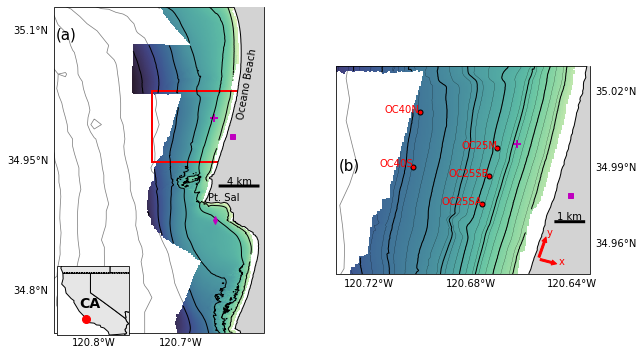

In [5]:
plt.close('all')
crs = ccrs.PlateCarree()
figsize = (10, 6)

# Left panel - entire experiment area.
bboxi = [-120.847, -120.6036, 34.751, 35.128]
fig, ax = plt.subplots(ncols=2, figsize=figsize, subplot_kw=dict(projection=crs))
mk_basemap(fig, ax[0], bboxi, xycoast=hires_coast, crs=crs)
scale_bar(ax[0], 4, location=(0.88, 0.45))

# Right panel - zoom in Oceano Beach.
bboxi = [-120.733, -120.633, 34.948, 35.03]
mk_basemap_zoom(fig, ax[1], bboxi, xycoast=hires_coast, crs=crs)
scale_bar(ax[1], 1, location=(0.92, 0.25))

# Plot Oceano Array moorings used and their names.
# OC25M -120.66953 34.9974
# OC25SA -120.67553 34.97535
# OC40N -120.70013 35.01176
# OC40S -120.70285 34.9902
# OC25SB -120.6727500, 34.9864000
xs = [-120.66953, -120.67553, -120.70013, -120.70285, -120.6727500]
ys = [34.9974, 34.97535, 35.01176, 34.9902, 34.9864000]
IDs = ["OC25M", "OC25SA", "OC40N", "OC40S", "OC25SB"]
for x, y, ID in zip(xs, ys, IDs):
    ax[1].plot(x, y, marker='o', mfc='r', mec='k', ms=5, zorder=9999)
    ax[1].text(x, y, ID, color='r', rotation=0, ha='right', zorder=9999)

# Wave buoy location.
lonSpot20, latSpot20 = -120.66176, 34.99926
ax[0].plot(lonSpot20, latSpot20, marker='+', mfc='m', mec='m', ms=8, mew=2)
ax[1].plot(lonSpot20, latSpot20, marker='+', mfc='m', mec='m', ms=8, mew=2)

# Met stations.
xmetSIO, ymetSIO = -120.65993333333333, 34.88141666666667 # Terril Met buoy.
xmetGuadalupe, ymetGuadalupe = -120.64082, 34.97894 # APL OB station.
ax[0].plot(xmetSIO, ymetSIO, marker='d', mfc='m', mec='m', ms=5, zorder=99999)
ax[0].plot(xmetGuadalupe, ymetGuadalupe, marker='s', mfc='m', mec='m', ms=5, zorder=99999)
ax[1].plot(xmetGuadalupe, ymetGuadalupe, marker='s', mfc='m', mec='m', ms=5, zorder=99999)

# Rectangle with zoomed in OB area.
ax[0].plot([bboxi[0], bboxi[1]], [bboxi[2], bboxi[2]], 'r', linewidth=2.0)
ax[0].plot([bboxi[0], bboxi[1]], [bboxi[3], bboxi[3]], 'r', linewidth=2.0)
ax[0].plot([bboxi[0], bboxi[0]], [bboxi[2], bboxi[3]], 'r', linewidth=2.0)
ax[0].plot([bboxi[1], bboxi[1]], [bboxi[2], bboxi[3]], 'r', linewidth=2.0)

# Geography.
ax[0].text(-120.636, 35.00, 'Oceano Beach', rotation=80, zorder=99999)
ax[0].text(-120.668, 34.904, 'Pt. Sal', rotation=0, zorder=99999)

ax[0].text(0.01, 0.9, '(a)', fontsize=15, transform=ax[0].transAxes)
ax[1].text(0.01, 0.5, '(b)', fontsize=15, transform=ax[1].transAxes)

arrowprops = dict(arrowstyle="simple", facecolor="r", edgecolor="r")
x0, y0 = -120.6534, 34.9538
x1, y1 = -120.6454, 34.9517

ax[1].annotate("", xy=[x1, y1], xytext=[x0, y0], arrowprops=arrowprops, zorder=9999999) # x-axis
ax[1].text(x1, y1, "x", color='red', ha="left", zorder=9999999)

x1, y1 = -120.6501, 34.9632
ax[1].annotate("", xy=[x1, y1], xytext=[x0, y0], arrowprops=arrowprops, zorder=9999999) # y-axis
ax[1].text(x1, y1, "y", color='red', ha="left", zorder=9999999)

# CA map inset.
axm = plt.axes([0.16, 0.10, 0.1, 0.2], projection=crs)
axm.set_extent([-125, -114, 32.5, 43], crs)

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = ctpy.io.shapereader.natural_earth(resolution='110m', category='cultural', name=shapename)
for state in ctpy.io.shapereader.Reader(states_shp).geometries():
    axm.add_geometries([state], crs, facecolor=[0.9]*3, edgecolor='k')
axm.text(-120, 36.6, 'CA', fontweight='black', fontsize=14, ha='center')
# Dot marking the experiment site.
axm.plot(-120.652, 34.9395, marker='o', ms=8, mfc='r', mec='r')

In [6]:
plt.show()
fig.savefig('fig01.png', dpi=300, bbox_inches='tight')